In [8]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series, read_csv
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

# Boiler plate imports 
# I copy paste and remove later
import numpy as np
# Libraries I usually need
import pandas as pd
import scipy as sp
import scipy.stats as stats
import sklearn as skl
from pandas import DataFrame, Series
import seaborn as sns

penguin_url = "https://bit.ly/palmerpenguinscsv"

In [2]:
pen_df = pd.read_csv(penguin_url, index_col="rowid")

In [3]:
pen_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
rowid,,,,,,,,
1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [4]:
pen_df.dropna(inplace=True)
pen_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
rowid,,,,,,,,
1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [14]:
numeric_vals = (pen_df.iloc[:,2:-2])
numeric_vals.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
rowid,,,,
1,39.1,18.7,181.0,3750.0
2,39.5,17.4,186.0,3800.0
3,40.3,18.0,195.0,3250.0
5,36.7,19.3,193.0,3450.0
6,39.3,20.6,190.0,3650.0


In [23]:
numeric_vals["target"] = pen_df["species"]
numeric_vals.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,target
rowid,,,,,
1,39.1,18.7,181.0,3750.0,Adelie
2,39.5,17.4,186.0,3800.0,Adelie
3,40.3,18.0,195.0,3250.0,Adelie
5,36.7,19.3,193.0,3450.0,Adelie
6,39.3,20.6,190.0,3650.0,Adelie


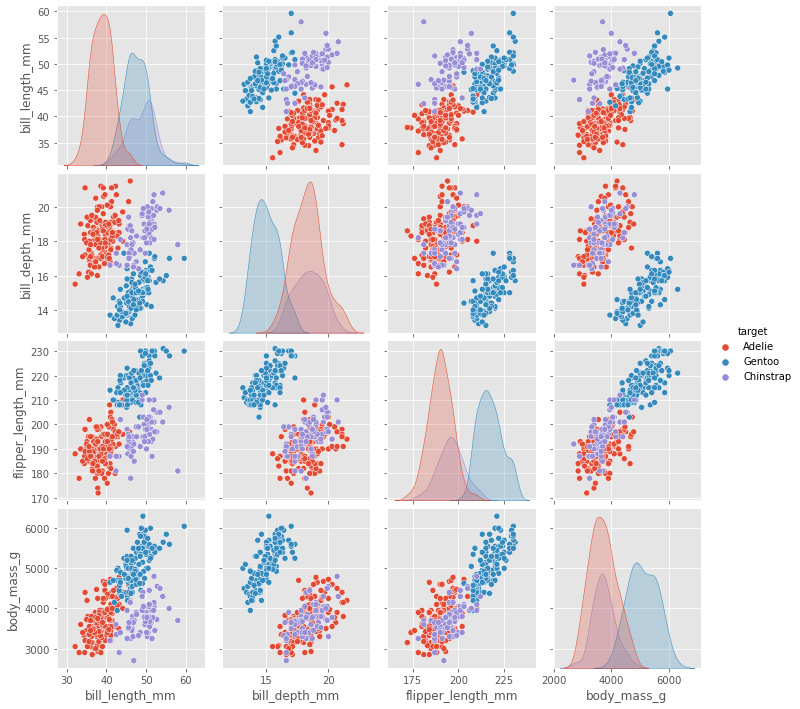

In [24]:
sns.pairplot(data=numeric_vals,hue="target")

In [25]:
labels = list(numeric_vals["target"].unique())
labels

['Adelie', 'Gentoo', 'Chinstrap']

In [32]:
target = np.array([labels.index(item) 
                    for item in numeric_vals["target"] ])
target[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [33]:
NV = numeric_vals.iloc[:,:-1].values
NV[:10]

array([[  39.1,   18.7,  181. , 3750. ],
       [  39.5,   17.4,  186. , 3800. ],
       [  40.3,   18. ,  195. , 3250. ],
       [  36.7,   19.3,  193. , 3450. ],
       [  39.3,   20.6,  190. , 3650. ],
       [  38.9,   17.8,  181. , 3625. ],
       [  39.2,   19.6,  195. , 4675. ],
       [  41.1,   17.6,  182. , 3200. ],
       [  38.6,   21.2,  191. , 3800. ],
       [  34.6,   21.1,  198. , 4400. ]])

In [35]:
# Just Adelie and Gentoo
X = NV[target!=2,:]
X[:10]

array([[  39.1,   18.7,  181. , 3750. ],
       [  39.5,   17.4,  186. , 3800. ],
       [  40.3,   18. ,  195. , 3250. ],
       [  36.7,   19.3,  193. , 3450. ],
       [  39.3,   20.6,  190. , 3650. ],
       [  38.9,   17.8,  181. , 3625. ],
       [  39.2,   19.6,  195. , 4675. ],
       [  41.1,   17.6,  182. , 3200. ],
       [  38.6,   21.2,  191. , 3800. ],
       [  34.6,   21.1,  198. , 4400. ]])

In [36]:
y = target[target!=2]
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
              X, y, test_size=0.33, random_state=42)

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn = KNeighborsClassifier(1)

In [42]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [45]:
yhat_train = knn.predict(X_train)
yhat[:10]

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0])

In [44]:
from sklearn.metrics import accuracy_score

In [47]:
print(f"Accuracy {accuracy_score(y_train,yhat_train)}")

Accuracy 1.0


In [48]:
yhat_test = knn.predict(X_test)
print(f"Accuracy {accuracy_score(y_test,yhat_test)}")

Accuracy 0.8977272727272727


In [53]:
from sklearn.metrics import confusion_matrix

In [55]:
print(confusion_matrix(y_train,yhat_train))

[[96  0]
 [ 0 81]]


In [54]:
print(confusion_matrix(y_test,yhat_test))

[[46  4]
 [ 5 33]]


In [70]:
# Just Adelie and Chinstrap
X = NV[target!=0,:]
y = target[target!=0]
y[:10], X[:10]

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 array([[  46.1,   13.2,  211. , 4500. ],
        [  50. ,   16.3,  230. , 5700. ],
        [  48.7,   14.1,  210. , 4450. ],
        [  50. ,   15.2,  218. , 5700. ],
        [  47.6,   14.5,  215. , 5400. ],
        [  46.5,   13.5,  210. , 4550. ],
        [  45.4,   14.6,  211. , 4800. ],
        [  46.7,   15.3,  219. , 5200. ],
        [  43.3,   13.4,  209. , 4400. ],
        [  46.8,   15.4,  215. , 5150. ]]))

In [71]:
X_train, X_test, y_train, y_test = train_test_split(
              X, y, test_size=0.33, random_state=42)

In [72]:
knn = KNeighborsClassifier(1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [73]:
yhat_train = knn.predict(X_train)
yhat[:10]

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0])

In [74]:
print(f"Accuracy {accuracy_score(y_train,yhat_train)}")
print(confusion_matrix(y_train,yhat_train))

Accuracy 1.0
[[82  0]
 [ 0 43]]


In [76]:
yhat_test = knn.predict(X_test)
yhat[:10]

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0])

Executing shutdown due to inactivity...


2021-11-10 17:11:28,125 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2021-11-10 17:11:28,143 - INFO     - Executing shutdown...


In [77]:
print(f"Accuracy {accuracy_score(y_test,yhat_test)}")
print(confusion_matrix(y_test,yhat_test))

Accuracy 0.9032258064516129
[[36  1]
 [ 5 20]]


In [ ]:
sklearn.naive_bayes.GaussianNB